# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [ ]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [ ]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

print(list(newsgroups_train.target_names))

['data', 'filenames', 'target_names', 'target', 'DESCR']
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print(type(newsgroups_train))

<class 'sklearn.utils.Bunch'>


In [ ]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(remove_tag(sentence)))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [ ]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [ ]:
def create_embeddings(articles):
  embedded=[]
  for item in articles:
    reviewed_a=get_review_embedding(item)
    embedded.append(reviewed_a)
  return embedded

In [ ]:
X=create_embeddings(newsgroups_train.data)
y=newsgroups_train.target

In [ ]:
X=np.array(X)
print(X.shape)

(11314, 768)


In [ ]:
print(X.shape)

(11314, 768)


In [ ]:
DF = pd.DataFrame(X)
  
# save the dataframe as a csv file
DF.to_csv("data1.csv")

In [ ]:
# print()

In [ ]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(2)
X_pca= pca.fit_transform(X)




In [ ]:
print(X_pca.shape)

(11314, 2)


In [ ]:
len(X_pca[0])

2

In [ ]:
print(y.shape)

(11314,)


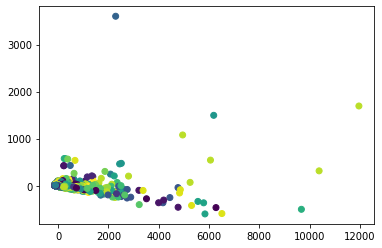

In [ ]:
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
plot=plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
# plt.legend(handles=plot.legend_elements()[0])
plt.show()


# K_Means Algorithm


In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=4).fit(X_pca)
kmeans.labels_
Cluster = np.array(kmeans.labels_)


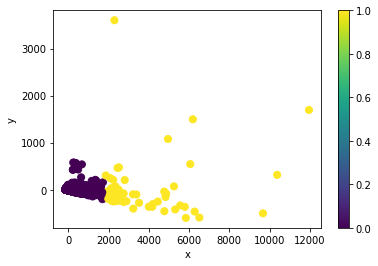

In [ ]:
#code for visualisation of clusters

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_pca[:,0], X_pca[:,1],c=Cluster,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()



# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







In [ ]:
def elbow_method(X):
  wcss = [] 
  for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 4)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS') 
  plt.show()

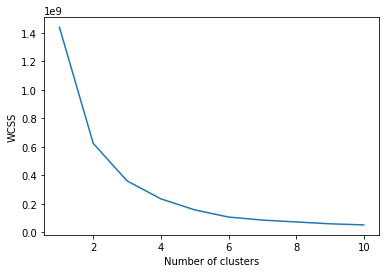

In [ ]:
elbow_method(X_pca)

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_Score(X):
  silhouette_scores = [] 
  for i in range(2, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 4)
    cluster_labels =kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
  plt.plot(range(2, 11), silhouette_scores)
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette_score') 
  plt.show()


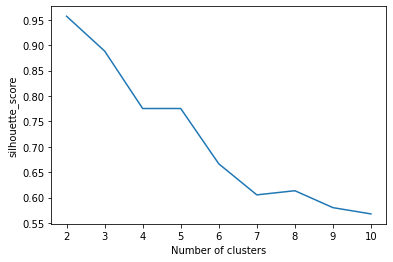

In [ ]:
silhouette_Score(X_pca)

# Agglomerative clustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClusterings(X):
  for linkages in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkages, n_clusters=2).fit(X)
    # plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
    # plot_dendrogram(clustering, truncate_mode="level", p=2)
    # plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    # plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:,0], X[:,1],c=clustering.labels_,s=50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(scatter)
    fig.show()
    print( "%s linkage" % linkages)
  # clustering.labels_


ward linkage
average linkage
complete linkage
single linkage


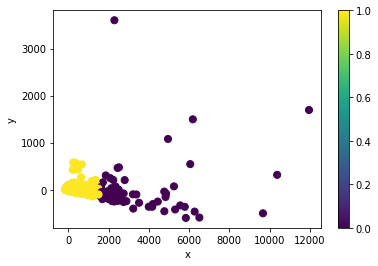

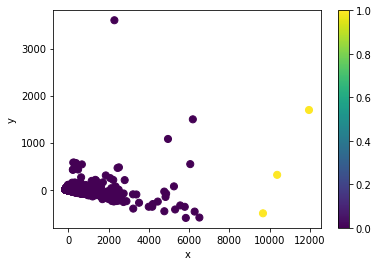

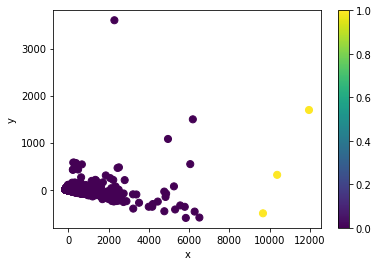

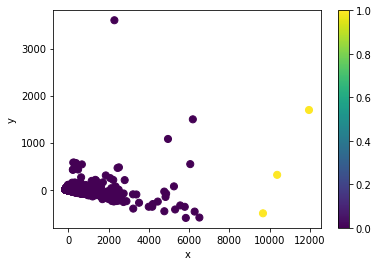

In [ ]:
#code for visualisation of clusters


AgglomerativeClusterings(X_pca)



# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



In [ ]:
# code to write dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def dendogram(X):
  for linkages in ("ward", "average", "complete", "single"):
    print( "%s linkage" % linkages)
    clustering = AgglomerativeClustering(linkage=linkages,distance_threshold=2000, n_clusters=None).fit(X)
    plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
    plot_dendrogram(clustering, truncate_mode="level", p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    print("\n")
    plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')
    plt.title(f"SK Learn estimated number of clusters = {1+np.amax(clustering.labels_)}")
    # plt.title(f"SK Learn estimated number of clusters = {1+np.amax(clustering.labels_)}")
    plt.show()
  # clustering.labels_



ward linkage


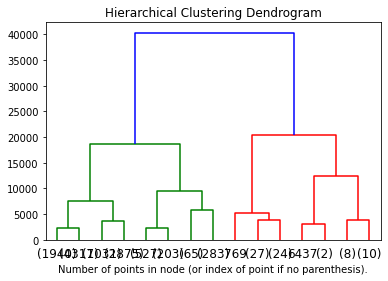

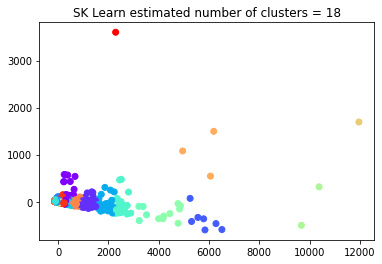

average linkage


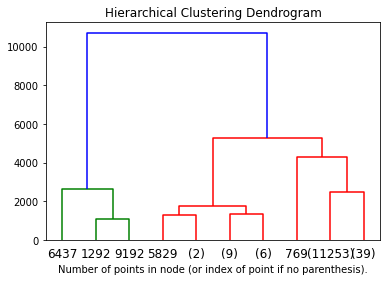

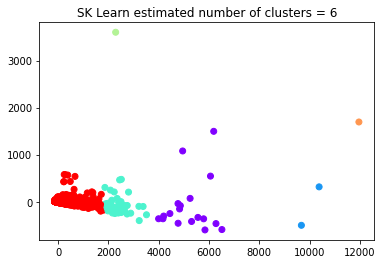

complete linkage


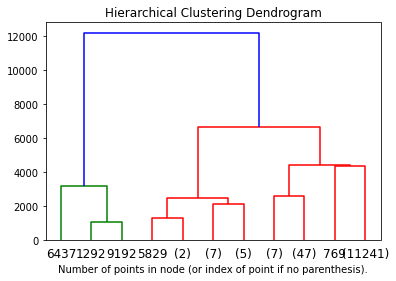

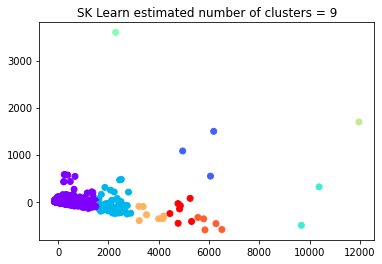

single linkage


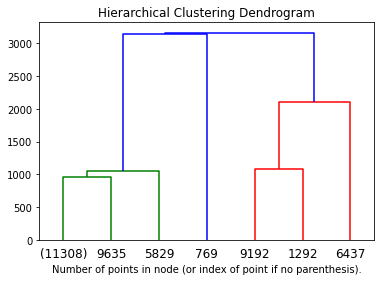

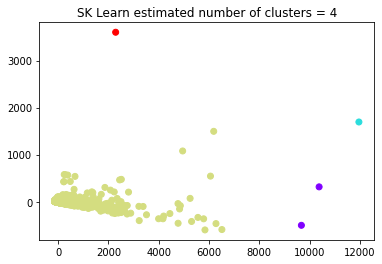

In [ ]:
dendogram(X_pca)

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


